In [555]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-sentiment-classification/sample_submission.csv
/kaggle/input/edsa-sentiment-classification/train.csv
/kaggle/input/edsa-sentiment-classification/test.csv


In [556]:
import pandas as pd
import numpy as np

In [557]:
df_train = pd.read_csv('../input/edsa-sentiment-classification/train.csv')

In [558]:
df_test = pd.read_csv('../input/edsa-sentiment-classification/test.csv')


In [559]:
print(df_train.shape)
print(df_test.shape)

(15819, 3)
(10546, 2)


In [564]:
df_1 = df_train
df_2 = df_test

<AxesSubplot:xlabel='sentiment', ylabel='count'>

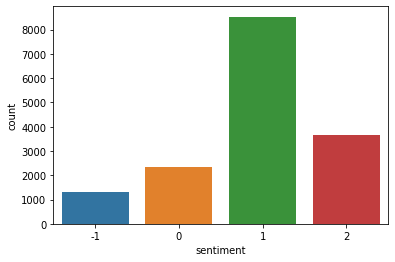

In [565]:
import seaborn as sns
sns.countplot(x='sentiment', data= df_1)

In [566]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [567]:
df_1['message'] = df_1.message.str.lower()
df_2['message'] = df_2.message.str.lower()
#Everything to lower case 

In [568]:
#We are going to use regular expressions to clean our tweets
import re

In [569]:
pattern = re.compile(r"(.)\1{2,}")

df_1.message = df_1.message.apply(lambda x:  pattern.sub(r"\1\1", x))
df_2.message = df_2.message.apply(lambda x:  pattern.sub(r"\1\1", x))
                                  

In [570]:
#remove url links 

df_1.message = df_1.message.apply(lambda x: re.sub(r"http\S+", "", x))
df_1.message.apply(lambda x: re.sub(r"www.\S+", "", x))

df_2.message = df_2.message.apply(lambda x: re.sub(r"http\S+", "", x))
df_2.message.apply(lambda x: re.sub(r"www.\S+", "", x))

0        europe will now be looking to china to make su...
1        combine this with the polling of staffers re c...
2        the scary, unimpeachable evidence that climate...
3        @karoli @morgfair @osborneink @dailykos \nputi...
4        rt @fakewillmoore: 'female orgasms cause globa...
                               ...                        
10541    rt @brittanybohrer: brb, writing a poem about ...
10542    2016: the year climate change came home: durin...
10543    rt @loop_vanuatu: pacific countries positive a...
10544    rt @xanria_0018: you’re so hot, you must be th...
10545    rt @chloebalaoing: climate change is a global ...
Name: message, Length: 10546, dtype: object

In [571]:
# remove html characters 

df_1.message = df_1.message.apply(lambda x: re.sub("@[A-Za-z0-9_]+","", x))
df_2.message = df_2.message.apply(lambda x: re.sub("@[A-Za-z0-9_]+","", x))

In [572]:
#remove mentions

df_1.message = df_1.message.apply(lambda x: re.sub(r'@[^ ]+', '', x))
df_2.message = df_2.message.apply(lambda x: re.sub(r'@[^ ]+', '', x))

In [573]:
df_1

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt : researchers say we have three years to ac...,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1,"rt : it's 2016, and a racist, sexist, climate ...",466954
...,...,...,...
15814,1,rt : they took down the material on global war...,22001
15815,2,rt : how climate change could be breaking up a...,17856
15816,0,notiven: rt: nytimesworld :what does trump act...,384248
15817,-1,rt : hey liberals the climate change crap is a...,819732


In [574]:
#remove hashtags
df_1.message = df_1.message.apply(lambda x: re.sub("#[A-Za-z0-9_]+","", x))
df_2.message = df_2.message.apply(lambda x: re.sub("#[A-Za-z0-9_]+","", x))

In [575]:
# remove the rt (retweet tag)
df_1.message = df_1.message.apply(lambda x: re.sub(r'\brt\b', '' , x))
df_2.message = df_2.message.apply(lambda x: re.sub(r'\brt\b', '' , x))

In [576]:
# remove all non-letter characters 

df_1.message = df_1.message.apply(lambda x: re.sub(r"[^a-z\s\(\-\)\\\/\];='#]", '', x))
df_2.message = df_2.message.apply(lambda x: re.sub(r"[^a-z\s\(\-\)\\\/\];='#]", '', x))

In [577]:
df_1

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,researchers say we have three years to act o...,698562
3,1,# wired was a pivotal year in the war on cli...,573736
4,1,it's and a racist sexist climate change den...,466954
...,...,...,...
15814,1,they took down the material on global warmin...,22001
15815,2,how climate change could be breaking up a -m...,17856
15816,0,notiven nytimesworld what does trump actually...,384248
15817,-1,hey liberals the climate change crap is a ho...,819732


In [578]:
#normalize words

df_1.message = df_1.message.apply(lambda x: re.sub(r'([A-Za-z])\1{2,}', r'\1', x))
df_2.message = df_2.message.apply(lambda x: re.sub(r'([A-Za-z])\1{2,}', r'\1', x))

In [579]:
#remove punctuation,convert 0 to zero

df_1.message = df_1.message.apply(lambda x: re.sub(r' 0 ', 'zero', x))
df_2.message = df_2.message.apply(lambda x: re.sub(r' 0 ', 'zero', x))

df_1.message = df_1.message.apply(lambda x: re.sub(r'[^A-Za-z ]', '', x))
df_2.message = df_2.message.apply(lambda x: re.sub(r'[^A-Za-z ]', '', x))

In [580]:
df_1

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,researchers say we have three years to act o...,698562
3,1,wired was a pivotal year in the war on clim...,573736
4,1,its and a racist sexist climate change deny...,466954
...,...,...,...
15814,1,they took down the material on global warmin...,22001
15815,2,how climate change could be breaking up a mi...,17856
15816,0,notiven nytimesworld what does trump actually...,384248
15817,-1,hey liberals the climate change crap is a ho...,819732


In [582]:
#remove words not in the nltk english corpus

words = set(nltk.corpus.words.words())

df_1['message'] = df_1['message'].apply(lambda x: ' '.join([word for word in x.split() if word in (words)]))
df_2['message'] = df_2['message'].apply(lambda x: ' '.join([word for word in x.split() if word in (words)]))


In [583]:
#remove words with a length less than 2 
df_1['message'] = df_1['message'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))
df_2['message'] = df_2['message'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

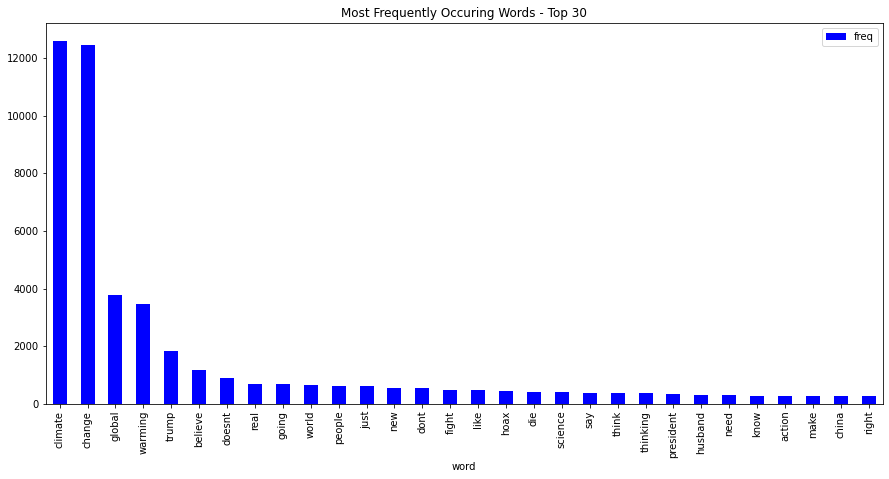

In [584]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_1.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

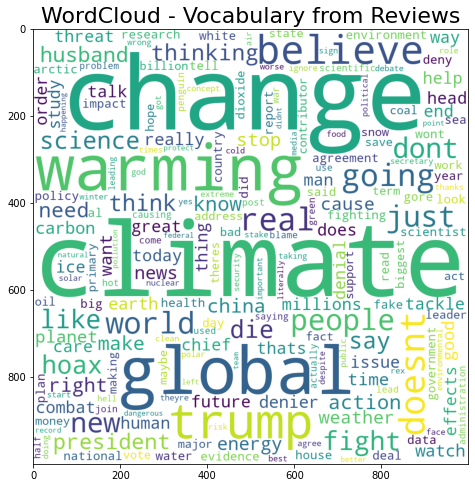

In [585]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

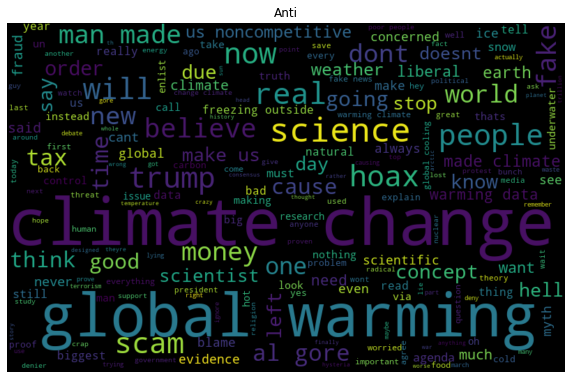

In [586]:
normal_words =' '.join([text for text in df_1['message'][df_1['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Anti')
plt.show()

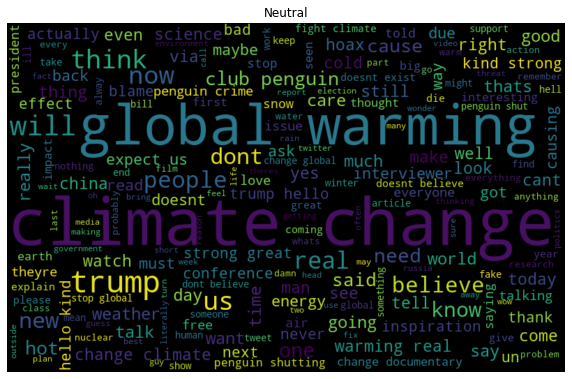

In [587]:
normal_words =' '.join([text for text in df_1['message'][df_1['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral')
plt.show()

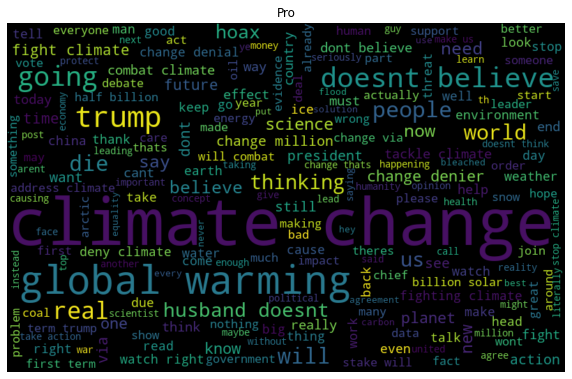

In [588]:
normal_words =' '.join([text for text in df_1['message'][df_1['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Pro')
plt.show()

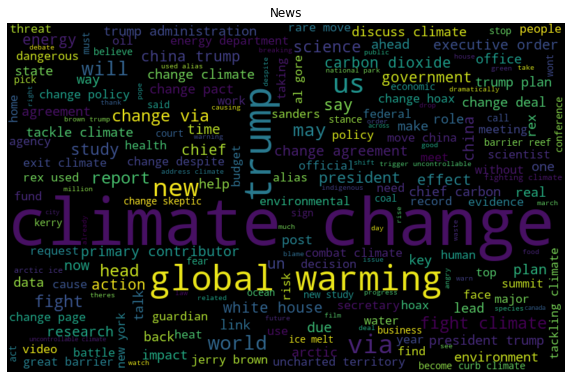

In [589]:
normal_words =' '.join([text for text in df_1['message'][df_1['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('News')
plt.show()

In [590]:
from nltk.tokenize import word_tokenize

tknzr = word_tokenize
df_1['tokens'] = df_1['message'].apply(tknzr)
df_2['tokens'] = df_2['message'].apply(tknzr)

In [591]:
df_1

,sentiment,message,tweetid,tokens
0,1,chief doesnt think carbon dioxide is main caus...,625221,"[chief, doesnt, think, carbon, dioxide, is, ma..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,say we have three to act on climate change bef...,698562,"[say, we, have, three, to, act, on, climate, c..."
3,1,wired was pivotal year in the war on climate c...,573736,"[wired, was, pivotal, year, in, the, war, on, ..."
4,1,its and racist climate change bigot is leading...,466954,"[its, and, racist, climate, change, bigot, is,..."
...,...,...,...,...
15814,1,they took down the material on global warming ...,22001,"[they, took, down, the, material, on, global, ..."
15815,2,how climate change could be breaking up relati...,17856,"[how, climate, change, could, be, breaking, up..."
15816,0,what does trump actually believe about climate...,384248,"[what, does, trump, actually, believe, about, ..."
15817,-1,hey the climate change crap is hoax that to th...,819732,"[hey, the, climate, change, crap, is, hoax, th..."


In [592]:
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

def lemmatizing(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

df_1['message_lemmatized'] = df_1.tokens.apply(lambda x:lemmatizing(x))
df_2['message_lemmatized'] = df_2.tokens.apply(lambda x:lemmatizing(x))

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [593]:
def final_text(words):
    return " ".join(words)
    
df_1['message']= df_1['message_lemmatized'].apply(lambda x:final_text(x))
df_2['message']=df_2['message_lemmatized'].apply(lambda x:final_text(x))

In [594]:
df_1

,sentiment,message,tweetid,tokens,message_lemmatized
0,1,chief doesnt think carbon dioxide is main caus...,625221,"[chief, doesnt, think, carbon, dioxide, is, ma...","[chief, doesnt, think, carbon, dioxide, is, ma..."
1,1,it not like we lack evidence of anthropogenic ...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evidence, of, anthro..."
2,2,say we have three to act on climate change bef...,698562,"[say, we, have, three, to, act, on, climate, c...","[say, we, have, three, to, act, on, climate, c..."
3,1,wired wa pivotal year in the war on climate ch...,573736,"[wired, was, pivotal, year, in, the, war, on, ...","[wired, wa, pivotal, year, in, the, war, on, c..."
4,1,it and racist climate change bigot is leading ...,466954,"[its, and, racist, climate, change, bigot, is,...","[it, and, racist, climate, change, bigot, is, ..."
...,...,...,...,...,...
15814,1,they took down the material on global warming ...,22001,"[they, took, down, the, material, on, global, ...","[they, took, down, the, material, on, global, ..."
15815,2,how climate change could be breaking up relati...,17856,"[how, climate, change, could, be, breaking, up...","[how, climate, change, could, be, breaking, up..."
15816,0,what doe trump actually believe about climate ...,384248,"[what, does, trump, actually, believe, about, ...","[what, doe, trump, actually, believe, about, c..."
15817,-1,hey the climate change crap is hoax that to th...,819732,"[hey, the, climate, change, crap, is, hoax, th...","[hey, the, climate, change, crap, is, hoax, th..."


In [595]:
# Setting the parameters for the Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 120000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )

In [596]:
# Build pipeline for word vectorization
from sklearn.pipeline import Pipeline
pipe = Pipeline( [('vect', vectorizer)] )

In [597]:
# Fitting & transforming the data
X = pipe.fit_transform(df_1['message'])
Z = pipe.transform(df_2['message'])

In [598]:
# Inspecting the shape of our vectorized data
print('train dims:', X.shape, 'test dims:', Z.shape)

train dim: (15819, 62766) test dim: (10546, 62766)


In [599]:
y = df_1['sentiment']

In [600]:
y.shape

(15819,)

In [619]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=15, stratify=y)

In [620]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1500)

# fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1500)

In [622]:
predictions = logreg.predict(X_test)

In [605]:
print(predictions)

[1 2 1 ... 1 1 1]


In [618]:
output = pd.DataFrame({'tweetid':df_test['tweetid'],
                     'sentiment': predictions})

output.to_csv("submision.csv",index=False)

In [623]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[  71   38  111   13]
 [  16  179  190   39]
 [  21   82 1298  135]
 [   2   11  141  501]]
              precision    recall  f1-score   support

          -1       0.65      0.30      0.41       233
           0       0.58      0.42      0.49       424
           1       0.75      0.85      0.79      1536
           2       0.73      0.76      0.75       655

    accuracy                           0.72      2848
   macro avg       0.67      0.58      0.61      2848
weighted avg       0.71      0.72      0.71      2848

0.7194522471910112
